In [1]:
#https://qiita.com/yshi12/items/26771139672d40a0be32(グラフ)
from sklearn import datasets
import pandas as pd
df = pd.read_csv('isigaki_miyako_iriomote_wavedata_3/miyako_2006_2018.csv', header=None)

import numpy as np
from sklearn.preprocessing import LabelEncoder
#データのロード
X = df.loc[:, 1:].values
#print(X)
y = df.loc[:, 0].values
df.keys()
df.head()
df.columns
df.columns = ["label","wind speed","temperature","precipitation amount","wave height"]

#print(df)
df.head()

,label,wind speed,temperature,precipitation amount,wave height
0,0,4.9,20.5,5.0,2.10
1,0,5.9,18.4,0.0,1.90
2,0,3.2,18.3,0.0,1.55
3,0,2.3,19.9,0.0,1.00
4,0,6.2,17.6,2.0,3.00


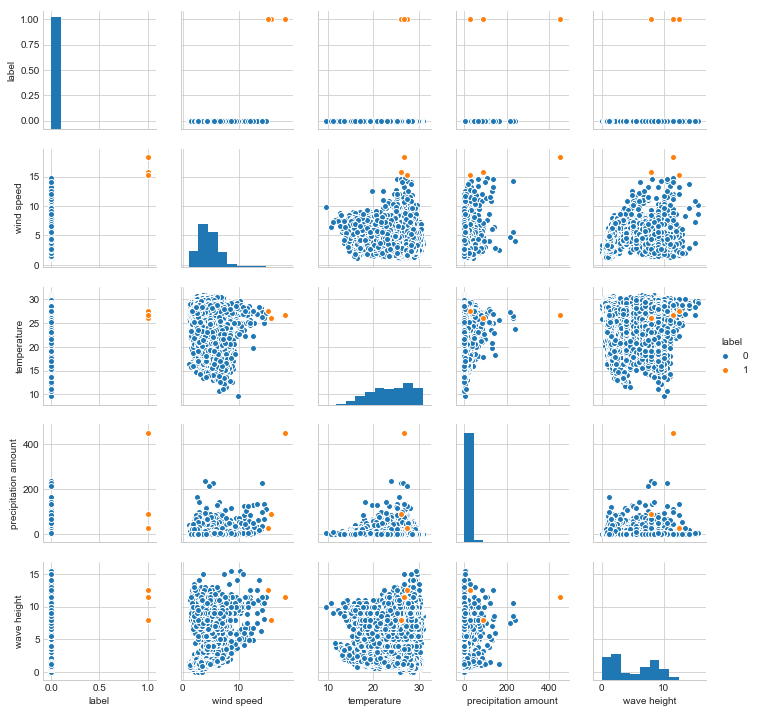

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

sns.pairplot(df, hue = 'label', size =2) 

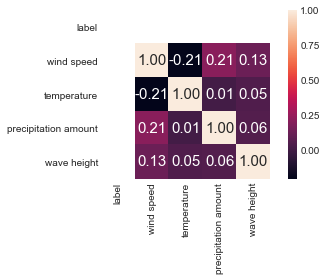

,label,wind speed,temperature,precipitation amount,wave height
0,NaN,4.9,20.5,5.0,2.10
1,NaN,5.9,18.4,0.0,1.90
2,NaN,3.2,18.3,0.0,1.55
3,NaN,2.3,19.9,0.0,1.00
4,NaN,6.2,17.6,2.0,3.00


In [3]:
import numpy as np

size_mapping = {'navigation': 0, 'canceled': 1}
df['label'] = df['label'].map(size_mapping)

cols = ['label','wind speed','temperature','precipitation amount','wave height']

cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()
df.head()

In [4]:
#データの分割（テスト用とトレーニング用）
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)
print('Labels counts in y[0 1]:', np.bincount(y))
print('Labels counts in y_train[0 1]:', np.bincount(y_train))
print('Labels counts in y_test[0 1]:', np.bincount(y_test))

Labels counts in y[0 1]: [4745    3]
Labels counts in y_train[0 1]: [3796    2]
Labels counts in y_test[0 1]: [949   1]


In [5]:
#標準化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std)

[[-0.26995539  0.54633235 -0.26609581 -1.07000565]
 [-0.8268456   0.49978174 -0.36878143 -1.08430653]
 [ 0.11986776  0.05755092 -0.36878143 -0.76968714]
 ...
 [-0.49271147  0.31357929 -0.36878143 -1.07000565]
 [ 0.11986776 -0.80363541  0.89767456 -0.183351  ]
 [-0.60408952 -1.59499583 -0.36878143 -0.32635982]]


[1] score: 1.00
[2] score: 1.00
[3] score: 1.00
[4] score: 1.00
[5] score: 1.00
[6] score: 1.00
[7] score: 1.00
[8] score: 1.00
[9] score: 1.00
[10] score: 1.00
[11] score: 1.00
[12] score: 1.00
[13] score: 1.00
[14] score: 1.00
[15] score: 1.00
[16] score: 1.00
[17] score: 1.00
[18] score: 1.00
[19] score: 1.00
[20] score: 1.00
[21] score: 1.00
[22] score: 1.00
[23] score: 1.00
[24] score: 1.00
[25] score: 1.00
[26] score: 1.00
[27] score: 1.00
[28] score: 1.00
[29] score: 1.00
[30] score: 1.00


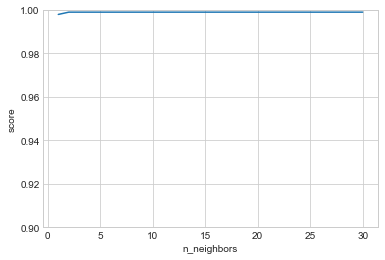

In [6]:
#
# K-近傍法
#
from sklearn.neighbors import KNeighborsClassifier

list_nn = []
list_score = []
for k in range(1, 31): # K = 1~30
  # KNeighborsClassifier
  knc = KNeighborsClassifier(n_neighbors=k)
  knc.fit(X_train, y_train)

  # 予測　
  Y_pred = knc.predict(X_test)

  # 評価 R^2
  score = knc.score(X_test, y_test)
  print("[%d] score: {:.2f}".format(score) % k)

  list_nn.append(k)
  list_score.append(score)

# プロット
plt.ylim(0.9, 1.0)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(list_nn, list_score)

In [7]:
  knc = KNeighborsClassifier(n_neighbors=2,n_jobs=-1)
  knc.fit(X_train, y_train)
print(df['label'].value_counts())
print(df.dtypes)


Series([], Name: label, dtype: int64)
label                   float64
wind speed              float64
temperature             float64
precipitation amount    float64
wave height             float64
dtype: object


In [8]:
pred = knc.predict(X_test)
#print(pred)

In [16]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv('isigaki_miyako_iriomote_wavedata_3/isigaki_2006_2018.csv', header=None)

import numpy as np
from sklearn.preprocessing import LabelEncoder
#データのロード
X = df.loc[:, [1,4]].values
#print(X)
y = df.loc[:, 0].values

#データの分割（テスト用とトレーニング用）
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)
print('Labels counts in y[0 1]:', np.bincount(y))
print('Labels counts in y_train[0 1]:', np.bincount(y_train))
print('Labels counts in y_test[0 1]:', np.bincount(y_test))

#標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std)

#knn実行
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(X_train_std, y_train)

# 評価 R^2
score = knc.score(X_test_std, y_test)
print("[%d] score: {:.2f}".format(score) % 100)

Labels counts in y[0 1]: [4723   25]
Labels counts in y_train[0 1]: [3778   20]
Labels counts in y_test[0 1]: [945   5]
[[-0.77081914  1.38505558]
 [-1.06589257  2.52798994]
 [-0.52492461  1.52792238]
 ...
 [-0.57410352 -1.00081989]
 [ 0.55701132 -1.12940001]
 [-0.37738789  0.9564552 ]]
[100] score: 1.00


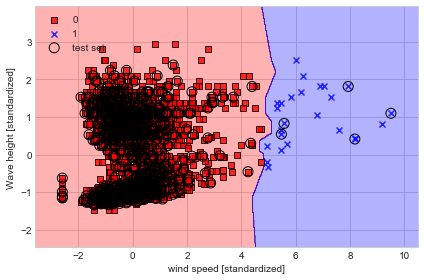

In [17]:
"""
probe=knc.predict_proba(X_test)
print(probe)
probe1=knc.predict(X_test)
plt.figure(1)
plot_data(X_test, y_test)
"""
X_combined_std = np.vstack((X_train_std, X_test_std))#結合しているのはテストデータをランダムに取得したため
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=knc, 
                      test_idx=range(3798, 4748))
plt.xlabel('wind speed [standardized]')
plt.ylabel('Wave height [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

In [18]:
#グラフをプロットするための関数
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
        
def plot_data(X, t):
    c=1
    positive = [i for i in range(len(t)) if t[i] == 1]
    negative = [i for i in range(len(t)) if t[i] == 0]

    plt.scatter(X[positive, 0], X[positive, c], c='red', marker='o', label='Canceled')
    plt.scatter(X[negative, 0], X[negative, c], c='blue', marker='o', label='Navigation')



データのクラス
[0 0 0 ... 0 0 0]
kncモデルによるデータのクラス予想
[0 0 0 ... 1 1 1]
データそれぞれに対するクラス[0 1]の所属解率
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


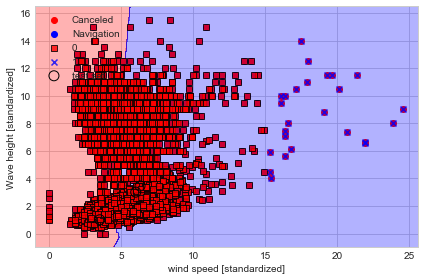

In [20]:
df1 = pd.read_csv('isigaki_miyako_iriomote_wavedata_3/isigaki_2006_2018.csv', header=None)
X1 = df1.loc[:, [1,4]].values
#print(X)
y1 = df1.loc[:, 0].values
#print(y)
#y = np.where(y <= 1, 0, 1)#1は雨の合計降水量
le = LabelEncoder()
#print(y)
y1 = le.fit_transform(y1)

#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#X1_train_pca = pca.fit_transform(X1)
predict = knc.predict(X1)
predict_proba = knc.predict_proba(X1)

#データに対する予測確率
print('データのクラス')
print(y1)
print('kncモデルによるデータのクラス予想')
print(predict)
print('データそれぞれに対するクラス[0 1]の所属解率')
print(predict_proba)

plt.figure(1)
plot_data(X1, y1)


plot_decision_regions(X=X1, y=y1,
                      classifier=knc, test_idx=range(3, 6))#test_idx=range(105, 150)はテストデータの開始行数から終了行数まで
plt.xlabel('wind speed [standardized]')
plt.ylabel('Wave height [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()